In [1]:
import xlrd
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# <u> 1. Data Set Description <u>


<ul>
<li> <b> df </b> is a dataset of the performance and attrition details of all the employees of a company. Each row is an employee.  
 </li>
<li> <b> salary</b> is a dataset of the average market salary taken from payscale for the each job role. Each row is a job role.</li>
<li> <b> df2 </b> is the merged dataset between <b> df </b> and <b> salary </b>.
</ul>

Important columns in <b> df </b> are:
<ol>
<li> Age: Age of the employee </li>
<li> Attrition: If the employee has left the company ('1') or not left the company ('0'). </li>
<li> Business_Travel: The amount of business travel that has been done by the employee [Values:  Travel_Frequently, Travel_Rarely, Non-Travel]. </li>
<li> Department: The department to which the employee belongs. It can be Sales, Human Resources or Research & Development.</li>
<li> DistanceFromHome: The distance of the office from the employee's house. </li>
<li> Education: The education level of the employee. The values can be from 1 to 5 : (1 :'Below College' 2:'College' 3: 'Bachelor' 4: 'Master' 5: 'Doctor')</li>
<li> EducationField: Education Field of an employee. </li>
<li> EmployeeNumber: Employee number of an employee in that company. </li>
<li> EnvironmentSatisfaction: The environment satisfaction level of an employee in the company. The values can be from 1 to 4 :(1: 'Low' 2: 'Medium' 3: 'High' 4: 'Very High') </li>
<li> Gender: The gender of the employee. It can be Male or Female.
<li> JobInvolvement	: The Job Involvement of an employee for the company- physically, mentally, emotionally.The values can be from 1 to 4 :(1: 'Low' 2: 'Medium' 3: 'High' 4: 'Very High') </li>
<li> JobLevel:Job level of the employee in the company. The values can be from 1 to 5 : 1 being the junior most position </li>
<li> JobRole:Job Role of the employee in the company. </li>
<li> JobSatisfaction:The Job satisfaction level of an employee in the company. The values can be from 1 to 4 :(1: 'Low' 2: 'Medium' 3: 'High' 4: 'Very High') </li>
<li> MonthlyIncome: The Monthly Income of an employee.</li>
<li> OverTime: It status whether the employee has worked overtime or not. The values for this field can be 'Yes' or 'No' </li>	
</ol>

Important columns in <b> salary </b> are:
<ol>
<li> Department: The department to which the employee belongs. It can be Sales, Human Resources or Research & Development.</li>
<li> JobLevel:Job level of the employee in the company. The values can be from 1 to 5 : 1 being the junior most position </li>
<li> Mean: The Mean market salary for the Job Role.</li>


In [2]:
df = pd.read_csv('recruitment_evaluation_data_1.csv')
salary = pd.read_excel('salary_by_dept&joblevel_1.xlsx')

Merging two data sets

In [3]:
df2=df.merge(salary,left_on=['Department','JobLevel'], right_on=['Dept','Job_Level'], how='left')


In [4]:
df.head()

,b,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalesRating,HireSource,Campus
0,1,41,1,Travel_Rarely,1102,Sales,1,2,LifeSciences,1,...,8,0,1,6,4,0,5,1.08819,AppliedOnline,Null
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,LifeSciences,2,...,10,3,3,10,7,1,7,0.00000,Null,Null
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,7,3,3,0,0,0,0,0.00000,Campus,Tech
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,LifeSciences,5,...,8,3,3,8,7,3,0,0.00000,Null,Null
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,6,3,3,2,2,2,2,0.00000,Referral,Null


# <u> 2. Data Preparation </u>


Calculate the difference between the salary of an employee of a Job Level and a Department to the average market salary of that Job Level and Department

In [5]:
df2['Annual_Income']= df2.MonthlyIncome*12

In [6]:
df2['Salary_diff']= df2['Annual_Income']- df2['Mean_Salary']

Creating bins

In [7]:
df2.loc[(df2.JobSatisfaction<=2) &  (df2.DistanceFromHome<=7),'Job_distance_bin']='JobSatisfication_less_Dist_less'
df2.loc[(df2.JobSatisfaction>2) &  (df2.DistanceFromHome<=7),'Job_distance_bin']='Job_Satisfication_more_Dist_less'
df2.loc[(df2.JobSatisfaction<=2) &  (df2.DistanceFromHome>7),'Job_distance_bin']='Job_Satisfication_less_Dist_more'
df2.loc[(df2.JobSatisfaction>2) &  (df2.DistanceFromHome>7),'Job_distance_bin']='Job_Satisfication_more_Dist_more'

In [8]:
df2.loc[(df2.NumCompaniesWorked >0),'TenurePerJob']= (df2.TotalWorkingYears+0.0)/ df2.NumCompaniesWorked
df2.loc[(df2.NumCompaniesWorked ==0),'TenurePerJob']= 0

In [9]:
df2.loc[(df2.YearsSinceLastPromotion ==0),'Last_Promotion_or_RoleChange']= 0
df2.loc[(df2.YearsSinceLastPromotion > 0) &((df2.YearsSinceLastPromotion > df2.YearsInCurrentRole)),'Last_Promotion_or_RoleChange']= df2.YearsInCurrentRole
df2.loc[(df2.YearsSinceLastPromotion > 0) &((df2.YearsSinceLastPromotion <= df2.YearsInCurrentRole)),'Last_Promotion_or_RoleChange']= df2.YearsSinceLastPromotion 

In [10]:
df2.loc[(df2.YearsAtCompany ==0),'LastJobChangeYears']= 0
df2.loc[(df2.YearsAtCompany > 0),'LastJobChangeYears']= df2.TotalWorkingYears-df2.YearsAtCompany 


Calculating the Minimum Salary and Maximum Salary within the company at a Job Level for a particular department

In [11]:
dfMin=df2.groupby(['Department','JobLevel'], as_index=False)[['MonthlyIncome']].min().rename(columns={'MonthlyIncome':'MinMonthlyIncome','Department':'Dep','JobLevel':'Job_L'})

In [12]:
dfMin.head(1)

,Dep,Job_L,MinMonthlyIncome
0,HumanResources,1,1555


In [13]:
dfMax=df2.groupby(['Department','JobLevel'], as_index=False)[['MonthlyIncome']].max().rename(columns={'MonthlyIncome':'MaxMonthlyIncome','Department':'Dep','JobLevel':'Job_L'})

In [14]:
dfMax.head(1)

,Dep,Job_L,MaxMonthlyIncome
0,HumanResources,1,4936


Merging the dataset into existing dataframe

In [15]:
df3=df2.merge(dfMin,left_on=['Department','JobLevel'], right_on=['Dep','Job_L'], how='left')
df3.drop(['Job_L','Dep'],axis=1, inplace=True)
df4=df3.merge(dfMax,left_on=['Department','JobLevel'], right_on=['Dep','Job_L'], how='left')
df3=df4

Salary peneration defines how much an employee's salary has penetrated.

In [16]:
df3['Salary_penetration']=(((df3.MonthlyIncome+0.0)-df3.MinMonthlyIncome)*100)/((df3.MaxMonthlyIncome+0.0)-df3.MinMonthlyIncome)

Drop the unnecessary columns

In [17]:
df3=df3.drop(['a','Job_L','Dep','b','Annual_Income','EmployeeNumber','DailyRate','HourlyRate','MonthlyRate','StandardHours','Dept','SalesRating','HireSource','Campus','Mean_Salary'],axis=1)

In [18]:
df3.loc[df3.Age<=30,'Age_bin']='Less_than_30'
df3.loc[(df3.Age>30) & (df3.Age<=36),'Age_bin']='Greater_than_30_less_than_36'
df3.loc[(df3.Age>36) & (df3.Age<=43),'Age_bin']='Greater_than_36_less_than_43'
df3.loc[(df3.Age>43),'Age_bin']='Greater_than_43'

Converting Yes or No values ot 0 or 1

In [19]:
df3['OverTime_bin']=(df3.OverTime=='Yes')+0.0

In [20]:
df4=df3.drop(['Age','JobRole','OverTime','DistanceFromHome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'],axis=1)

In [21]:
df4_dummy= pd.get_dummies(df4,columns=['BusinessTravel','Job_distance_bin','Department','EducationField','Age_bin','Gender' ])

# <u> 3. Interesting Finding Summary </u>

# <u> 4. Machine Learning Techinques </u>

In [22]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [23]:
X=df4_dummy.drop(['Attrition','StockOptionLevel'],axis=1)
Y=df4_dummy.Attrition

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [25]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X=X,y=Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

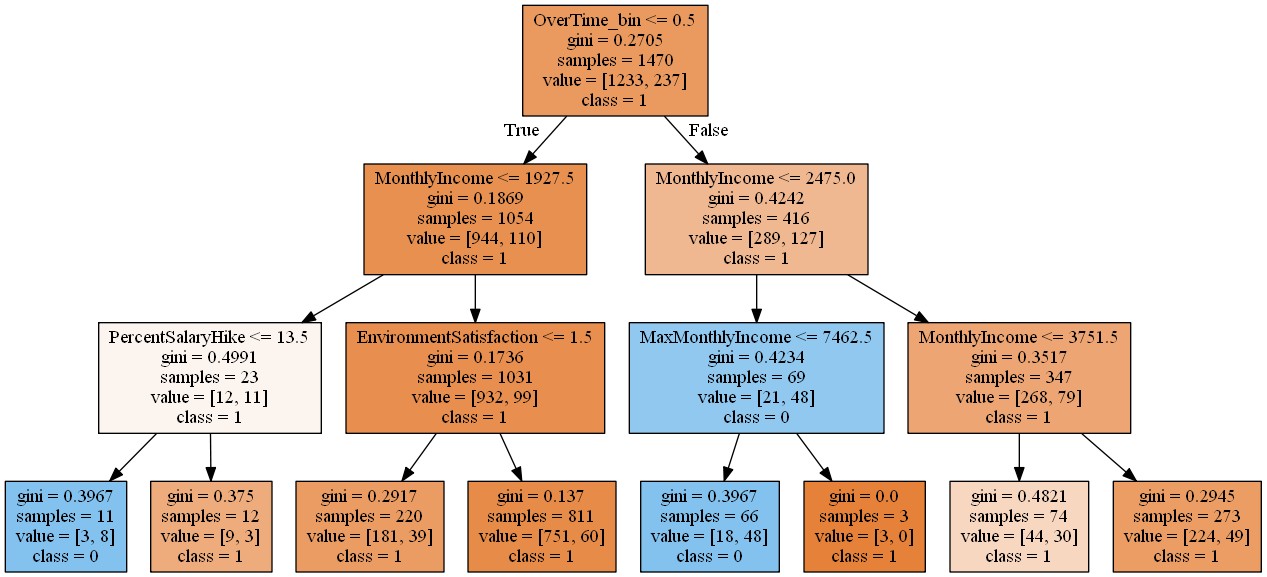

In [26]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

# Insight 1: Employees who work overtime and are paid less salary, tend to leave the company more than those who do not work overtime


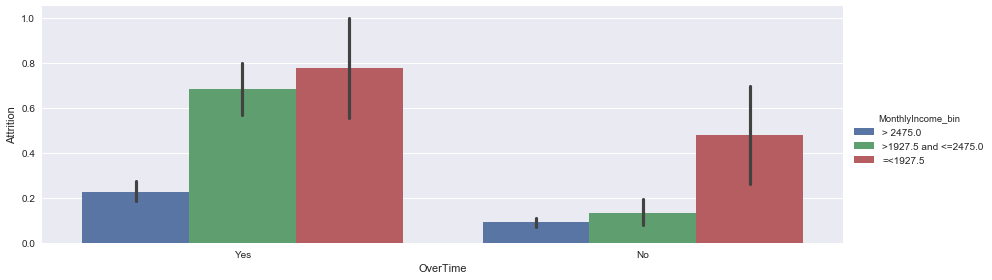

In [28]:
df2.loc[(df2.MonthlyIncome <= 1927.5) ,'MonthlyIncome_bin']='=<1927.5'
df2.loc[(df2.MonthlyIncome > 1927.5) & (df2.MonthlyIncome <= 2475.0),'MonthlyIncome_bin']='>1927.5 and <=2475.0'
df2.loc[(df2.MonthlyIncome > 2475.0) ,'MonthlyIncome_bin']='> 2475.0'

sns.factorplot(x='OverTime',y='Attrition',hue='MonthlyIncome_bin', data=df2 ,kind='bar', aspect=3)

In [30]:
clusters=df4_dummy
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=5, random_state=0)
clu.fit(clusters)
clusters['cluster'] = clu.labels_
clusterz=clusters.groupby('cluster').mean()


In [31]:
clusterz


,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree,Age_bin_Greater_than_30_less_than_36,Age_bin_Greater_than_36_less_than_43,Age_bin_Greater_than_43,Age_bin_Less_than_30,Gender_Female,Gender_Male
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.130556,2.900000,2.736111,2.738889,1.683333,2.747222,4426.302778,15.147222,2.897222,2.569444,...,0.094444,0.372222,0.069444,0.075000,0.341667,0.241667,0.147222,0.269444,0.422222,0.577778
1,0.135922,3.014563,2.665049,2.601942,2.956311,2.733010,10845.961165,15.325243,2.893204,2.805825,...,0.189320,0.296117,0.038835,0.097087,0.286408,0.262136,0.364078,0.087379,0.412621,0.587379
2,0.254989,2.751663,2.742794,2.764967,1.064302,2.707317,2550.800443,15.330377,2.904656,2.764967,...,0.022173,0.334812,0.055432,0.119734,0.263858,0.150776,0.124169,0.461197,0.354767,0.645233
3,0.123779,3.029316,2.703583,2.719870,2.241042,2.765472,6550.413681,15.182410,2.905537,2.677524,...,0.192182,0.224756,0.055375,0.078176,0.348534,0.244300,0.205212,0.201954,0.420195,0.579805
4,0.061644,3.054795,2.739726,2.801370,4.458904,2.664384,17604.000000,14.883562,3.000000,2.842466,...,0.116438,0.335616,0.047945,0.047945,0.027397,0.280822,0.684932,0.006849,0.424658,0.575342


# Insight 2: Employees who stay away from work and have less job satisfaction have a higher chance for leaving the company than employees who stay near from work and have less job satisfaction

In [43]:
df2.DistanceFromHome.corr(df2.Attrition)

0.077923582955703563

In [42]:
df2.JobSatisfaction.corr(df2.Attrition)

-0.10348112606902131

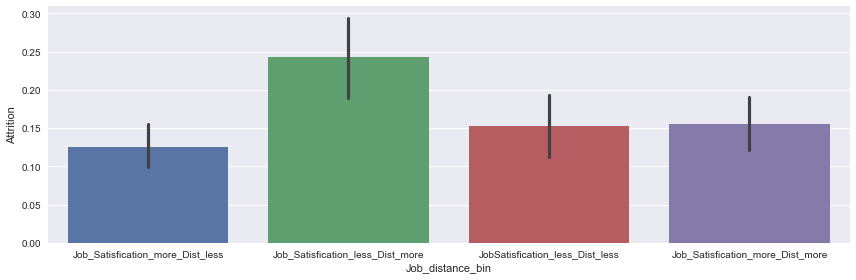

In [34]:
sns.factorplot(x='Job_distance_bin',y='Attrition', data=df3 ,kind='bar', aspect=3)

# Insight 3: Employees who are paid less than their colleagues and market salary have higher probability of leaving the company 

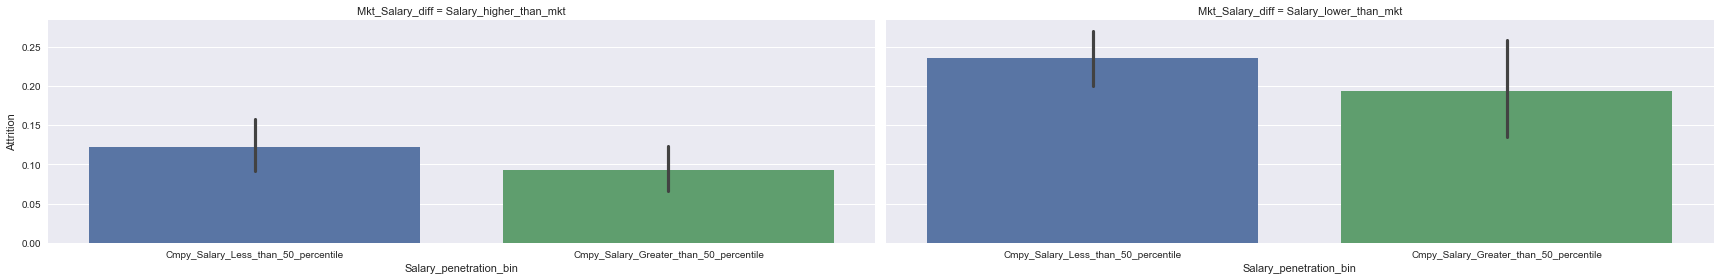

In [51]:
df3.loc[(df3.Salary_penetration <= 50),'Salary_penetration_bin']='Cmpy_Salary_Less_than_50_percentile'
df3.loc[(df3.Salary_penetration > 50), 'Salary_penetration_bin']='Cmpy_Salary_Greater_than_50_percentile'
df3.loc[(df3.Salary_diff > 0), 'Mkt_Salary_diff']='Salary_higher_than_mkt'
df3.loc[(df3.Salary_diff <= 0), 'Mkt_Salary_diff']='Salary_lower_than_mkt'

sns.factorplot(x='Salary_penetration_bin',y='Attrition', data=df3 ,kind='bar', col='Mkt_Salary_diff',aspect=3)

# Insight: Male Employees tend to leave the company more and faster as compared to female employees

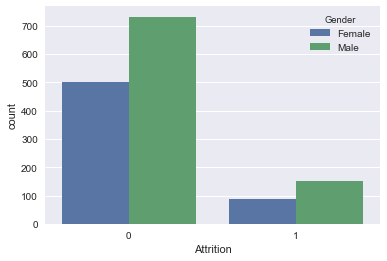

In [41]:
sns.countplot(x='Attrition', data=df3,hue='Gender')


In [37]:
df3.groupby(['Gender'])['Attrition','YearsAtCompany'].mean()

,Attrition,YearsAtCompany
Gender,,
Female,0.147959,7.231293
Male,0.170068,6.859410


# <u> 5. Managerial Insights </u>

Attrition is major cost to the companies It’s important to understand why the attrition is happening, what factors are leading for the employees to leave the company. There are couple of observations that lead to an attrition in the company which can help the companies to take measures to reduce the attrition where acceptable.
<ol>  <li> Usually, over time employees are paid more compared to others. But, we can see employees working overtime and have comparatively less than market salary so thus there is high proportion of employees working overtime and having less salary tends to have higher attrition rate.
<li>   Job satisfaction and distance from workplace also plays key role in attrition. It’s interesting to observe that employees have less job satisfaction and stay close by to company and employees have more job satisfaction and stay far away from company tends to have same attrition. </li></ol>

Therefore, a company or managers can consider why overtime employees aren’t paid as standards, and does really job satisfaction and distance from workplace play a role in attrition, which is against our usual assumption that employees having job satisfaction won’t tend to leave the company